In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect('top_gun_data_1.db')


    # Create a cursor object to execute queries
cursor = conn.cursor()

# Example query: Select all data from 'degradations' table
cursor.execute("""
WITH evolution_usure as (
SELECT 
    linked_aero,
    compo_concerned,
    measure_day,
    usure_ancienne,
    usure_nouvelle,
    (usure_nouvelle - usure_ancienne) AS evolution_usure
FROM (
    SELECT 
        linked_aero,
        compo_concerned,
        measure_day,
        LAG(usure_nouvelle, 1,0) OVER (PARTITION BY linked_aero, compo_concerned ORDER BY measure_day) AS usure_ancienne,
        usure_nouvelle
    FROM 
        degradations
) AS subquery
ORDER BY 
    linked_aero, 
    compo_concerned, 
    measure_day)
SELECT l."aero_linked",l."jour_vol",l."time_en_air",l."etat_voyant",
l."temp en °C",l."pressure en hPa",l."vibrations en m/s²",e."compo_concerned",
e."usure_ancienne",e."usure_nouvelle",e."evolution_usure",c."categorie",c."desc",
c."lifespan",c."cout"
FROM logs_vols as l
JOIN evolution_usure as e ON e.linked_aero = l.aero_linked
JOIN composants as c ON c.aero = l.aero_linked
""")

# Fetch all rows
rows = cursor.fetchall()
data = []

for row in rows:
    data.append(row)     # Or process the rows as needed

# Close the cursor and connection
cursor.close()
conn.close()


In [4]:
evolution_degradation = pd.DataFrame(data,columns=["aero","jour_vol","time_en_air","etat_voyant","temp en °C","pressure en hPa","vibrations en m/s²"
                                                   ,"compo_concerned","usure_ancienne","usure_nouvelle","evolution_usure","categorie","desc"
                                                   ,"lifespan","cout"])
evolution_degradation.head()

,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,compo_concerned,usure_ancienne,usure_nouvelle,evolution_usure,categorie,desc,lifespan,cout
0,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Détecteurs de fumée,11066.0,2147.0
1,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Hublots,68978.0,3593.0
2,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Porte cargo,11447.0,2850.0
3,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Portes passagers,13107.0,3053.0
4,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Siège copilote,14200.0,3722.0


Analyser les correlations entre les indices vols et les dégradations

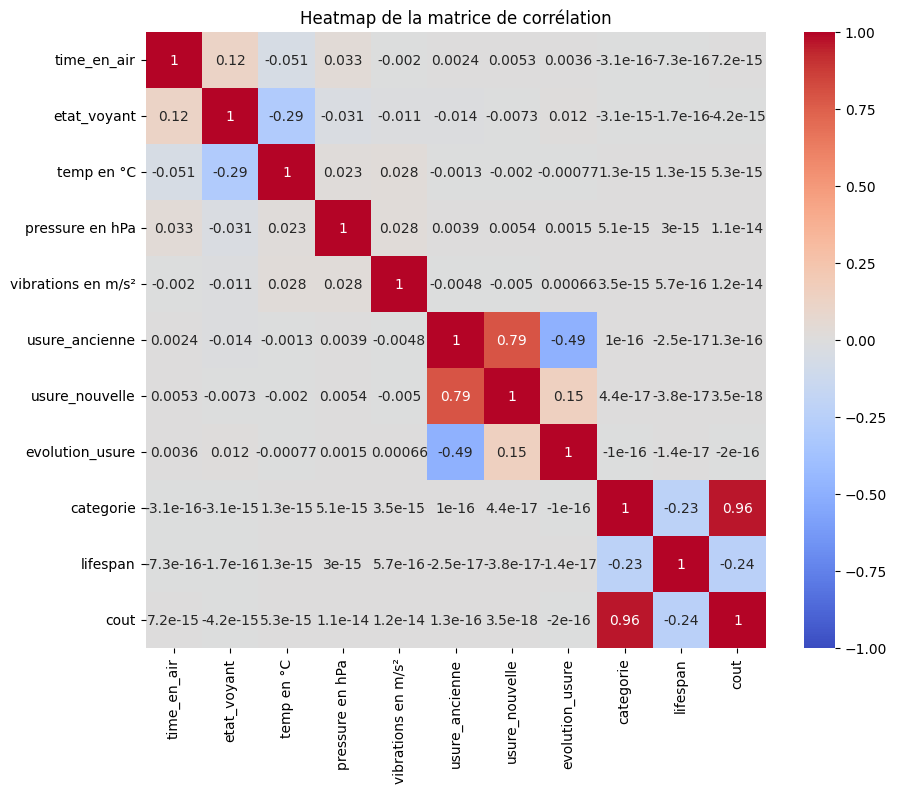

In [5]:
# Calculer la matrice de corrélation
corr_matrix = evolution_degradation.select_dtypes(include=['float64', 'int64']).corr()

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de la matrice de corrélation')
plt.show()

time_en_air           0.124333
temp en °C           -0.293967
pressure en hPa      -0.030735
vibrations en m/s²   -0.011141
usure_nouvelle       -0.007287
evolution_usure       0.011692
dtype: float64


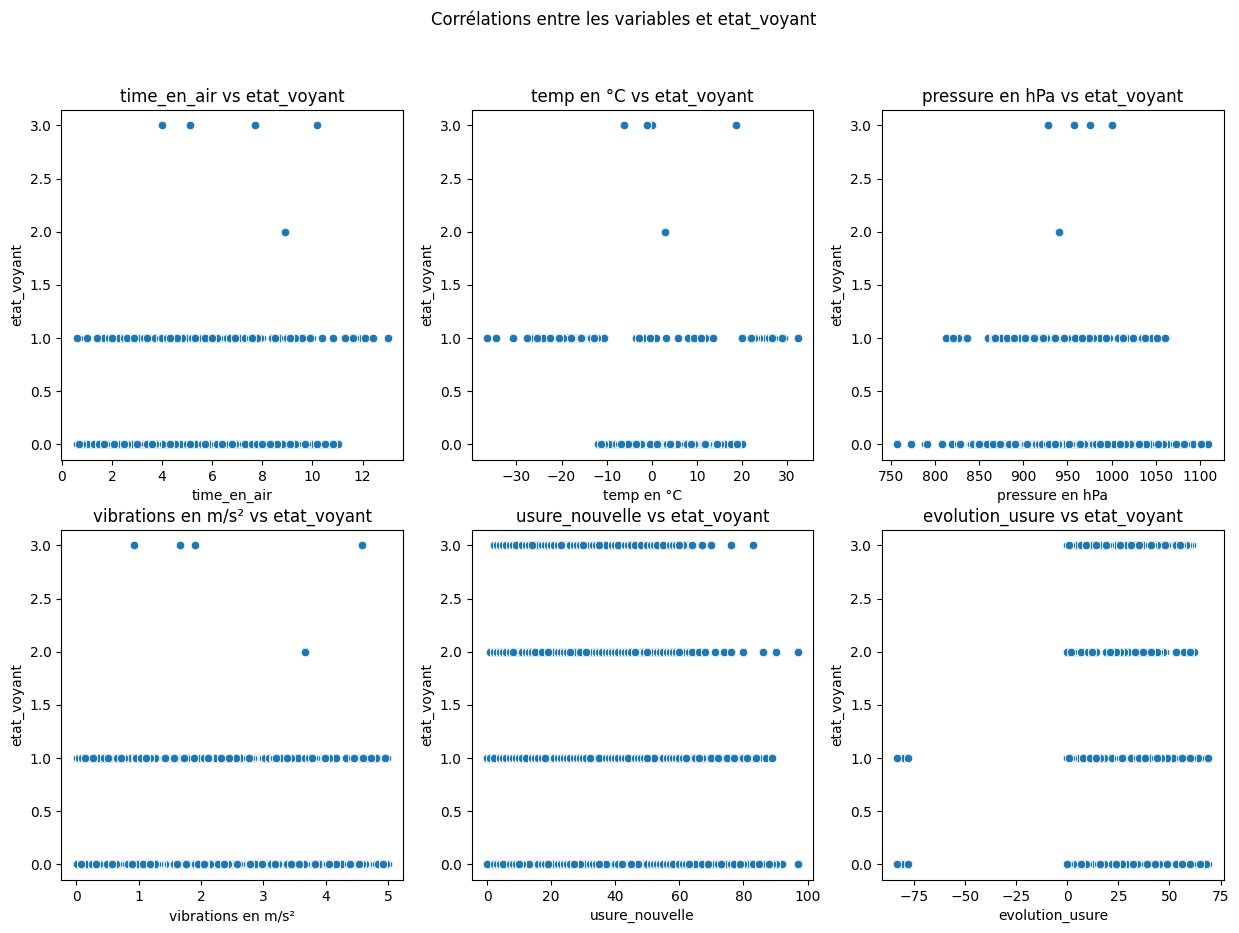

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Définir les variables 
X = evolution_degradation[["time_en_air","temp en °C","pressure en hPa","vibrations en m/s²","usure_nouvelle","evolution_usure"]]
y = evolution_degradation["etat_voyant"]

# Calcul des corrélations
correlations = X.corrwith(y)

# Afficher les coefficients de corrélation
print(correlations)

# Visualisation des scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Corrélations entre les variables et etat_voyant')

for i, col in enumerate(X.columns):
    row, col_pos = divmod(i, 3)
    sns.scatterplot(ax=axs[row, col_pos], x=X[col], y=y)
    axs[row, col_pos].set_title(f'{col} vs etat_voyant')
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel('etat_voyant')


Coefficients de corrélation :
time_en_air           0.003633
temp en °C           -0.000769
pressure en hPa       0.001451
vibrations en m/s²    0.000662
usure_nouvelle        0.149028
etat_voyant           0.011692
dtype: float64


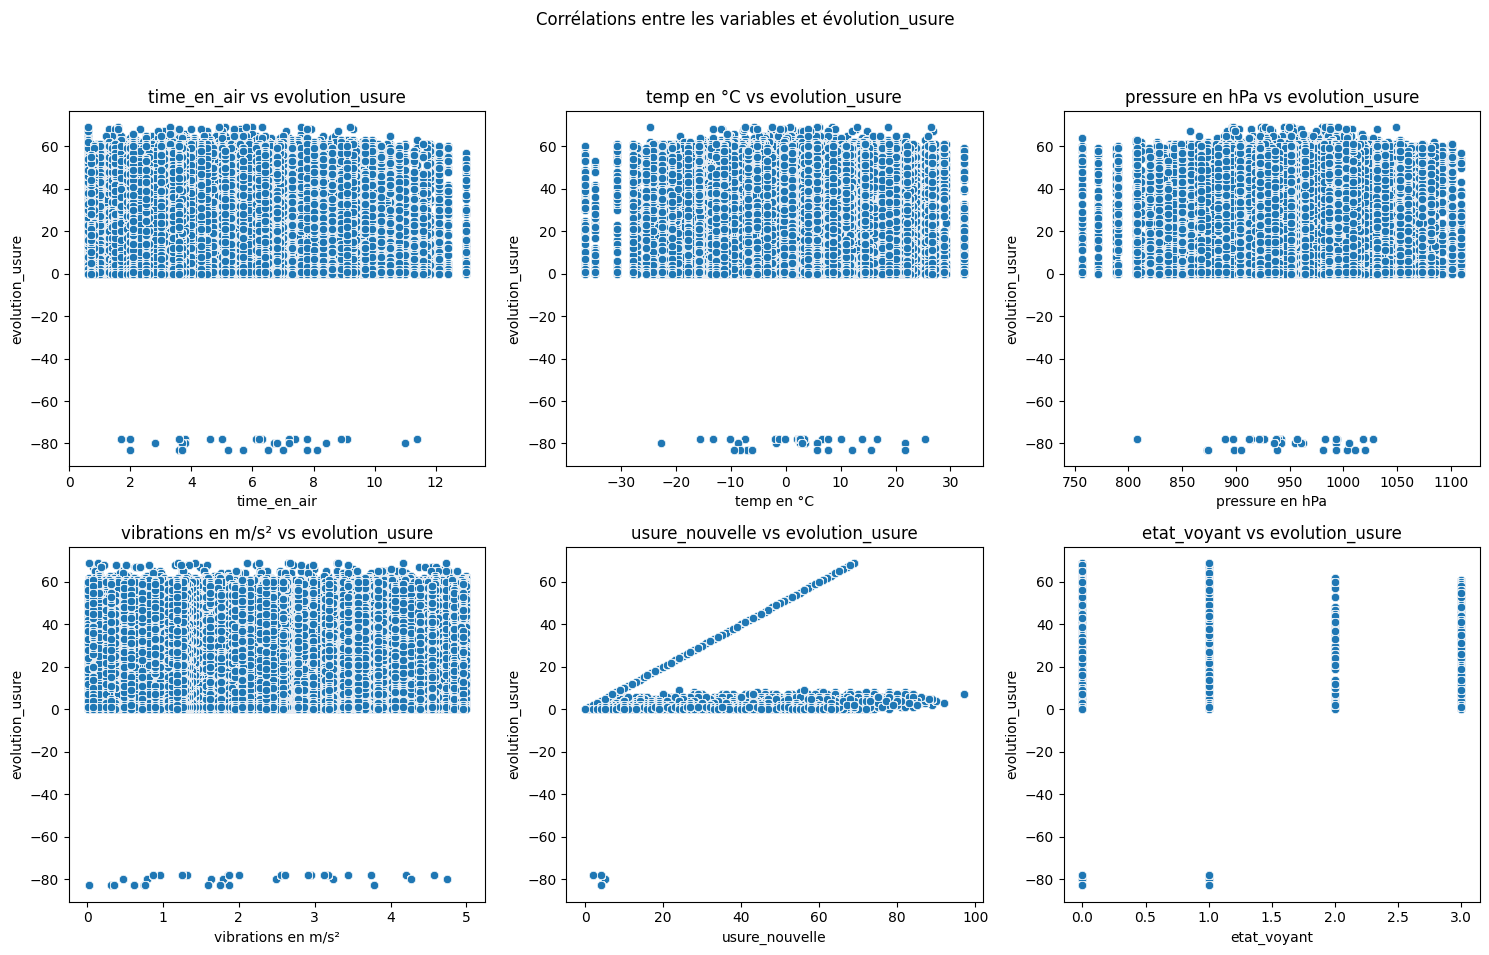

In [7]:
# Définir les variables 
X = evolution_degradation[["time_en_air", "temp en °C", "pressure en hPa", "vibrations en m/s²", "usure_nouvelle","etat_voyant"]]
y = evolution_degradation["evolution_usure"]

# Calcul des corrélations
correlations = X.corrwith(y)

# Afficher les coefficients de corrélation
print("Coefficients de corrélation :")
print(correlations)

# Visualisation des scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Corrélations entre les variables et évolution_usure')

for i, col in enumerate(X.columns):
    row, col_pos = divmod(i, 3)  # Utilisation de divmod pour obtenir la ligne et la colonne correctes
    sns.scatterplot(ax=axs[row, col_pos], x=X[col], y=y)
    axs[row, col_pos].set_title(f'{col} vs evolution_usure')
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel('evolution_usure')

# Supprimer les axes vides s'il y en a
if len(X.columns) % 3 != 0:
    for j in range(len(X.columns), 6):
        fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# LES TYPES DE COMPOSANTS

In [8]:
evolution_degradation.head()

,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,compo_concerned,usure_ancienne,usure_nouvelle,evolution_usure,categorie,desc,lifespan,cout
0,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Détecteurs de fumée,11066.0,2147.0
1,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Hublots,68978.0,3593.0
2,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Porte cargo,11447.0,2850.0
3,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Portes passagers,13107.0,3053.0
4,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Siège copilote,14200.0,3722.0


# Définir les types selon la référence unique de chaque composants

In [32]:
import re

def extract_type_compo(x):
    match = re.match(r'^(...).*', x)
    return match.group(1) if match else None

evolution_degradation["type_compo"] = evolution_degradation["compo_concerned"].apply(extract_type_compo)


In [36]:
def extract_ref_compo(x):
    match = re.search(r'(\d{2})$', x)
    return match.group(1) if match else None

evolution_degradation["type_compo_ref"] = evolution_degradation["compo_concerned"].apply(extract_ref_compo)

In [35]:
evolution_degradation

,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,compo_concerned,usure_ancienne,usure_nouvelle,evolution_usure,categorie,desc,lifespan,cout,type_compo,type_compo_ref
0,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Détecteurs de fumée,11066.0,2147.0,AIL,20
1,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Hublots,68978.0,3593.0,AIL,20
2,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Porte cargo,11447.0,2850.0,AIL,20
3,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Portes passagers,13107.0,3053.0,AIL,20
4,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Siège copilote,14200.0,3722.0,AIL,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564220,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,UNIB757-B757_4533-11,10.0,10.0,0.0,2,Système de gestion de carburant,13219.0,18351.0,UNI,11
21564221,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,UNIB757-B757_4533-11,10.0,10.0,0.0,2,Système de gestion électrique,10409.0,16266.0,UNI,11
21564222,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,UNIB757-B757_4533-11,10.0,10.0,0.0,2,Système de navigation,10541.0,16514.0,UNI,11
21564223,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,UNIB757-B757_4533-11,10.0,10.0,0.0,2,Système de surveillance du trafic aérien,10023.0,17135.0,UNI,11


In [39]:
# Initialiser un dictionnaire pour stocker les détails des composants
type_detail_compo = {}

# Parcourir chaque type de composant unique
for compo in evolution_degradation["type_compo"].unique():
    details = {
        "desc": evolution_degradation[evolution_degradation["type_compo"] == compo]["desc"].unique(),
        "categorie": evolution_degradation[evolution_degradation["type_compo"] == compo]["categorie"].unique(),
        "type_compo_ref": evolution_degradation[evolution_degradation["type_compo"] == compo]["type_compo_ref"].unique()
    }
    type_detail_compo[compo] = details



In [40]:
type_detail_compo

{'AIL': {'desc': array(['Détecteurs de fumée', 'Hublots', 'Porte cargo',
         'Portes passagers', 'Siège copilote', 'Siège pilote',
         "Système d'annonce publique", "Système d'approvisionnement en eau",
         'Système de divertissement en vol', "Systèmes d'oxygène d'urgence",
         'Toilettes', "Éclairage d'urgence", 'Éclairage de cabine',
         'Éclairage de la cabine', 'Ailerons', 'Empennage', 'Flaps',
         'Freins', 'Gouvernail de direction', 'Générateur électrique',
         'Spoilers', 'Système anti-givre',
         "Système d'extinction d'incendie",
         "Système de conditionnement d'air",
         'Système de contrôle des surfaces de vol',
         'Système de pressurisation', 'Système hydraulique principal',
         "Train d'atterrissage avant", "Train d'atterrissage principal",
         'Autopilote', 'Ordinateur de vol', 'Radar météorologique',
         'Réacteur droit', 'Réacteur gauche',
         "Système d'alerte de proximité au sol (GPWS)",
    

In [22]:
evolution_degradation[evolution_degradation["type_compo"] == "AIL"]

,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,compo_concerned,usure_ancienne,usure_nouvelle,evolution_usure,categorie,desc,lifespan,cout,type_compo
0,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Détecteurs de fumée,11066.0,2147.0,AIL
1,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Hublots,68978.0,3593.0,AIL
2,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Porte cargo,11447.0,2850.0,AIL
3,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Portes passagers,13107.0,3053.0,AIL
4,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Siège copilote,14200.0,3722.0,AIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552340,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,AILB757-B757_4533-20,60.0,61.0,1.0,2,Système de gestion de carburant,13219.0,18351.0,AIL
21552341,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,AILB757-B757_4533-20,60.0,61.0,1.0,2,Système de gestion électrique,10409.0,16266.0,AIL
21552342,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,AILB757-B757_4533-20,60.0,61.0,1.0,2,Système de navigation,10541.0,16514.0,AIL
21552343,B757_4533,2024-06-16,3.0,0,4.1,951.2,3.836,AILB757-B757_4533-20,60.0,61.0,1.0,2,Système de surveillance du trafic aérien,10023.0,17135.0,AIL


In [21]:
evolution_degradation[["categorie","type_compo","desc"]].value_counts()

categorie  type_compo  desc                            
1          SYS         Système de conditionnement d'air    425960
2          SYS         Système de gestion de carburant     212980
0          SYS         Éclairage d'urgence                 212980
                       Éclairage de cabine                 212980
                       Éclairage de la cabine              212980
                                                            ...  
1          EMP         Gouvernail de direction              10649
                       Générateur électrique                10649
                       Spoilers                             10649
                       Système anti-givre                   10649
2          UNI         Unité de gestion de l'air            10649
Name: count, Length: 880, dtype: int64